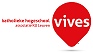<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
**SEARCH ALGORITHMS**<br>
Stefaan Haspeslagh & Andy Louwyck

---



---



#**SEARCH EXERCISER: OPTIMAL SEARCH**

This notebook explains how to use `SearchExerciser` to apply optimal search algorithms. 

##Cloning the GitHub repo

The `SearchExerciser` package is cloned from Github repository https://github.com/alouwyck/SearchExerciser:

In [1]:
import os, shutil

# remove directory 'SearchExerciser' if it already exists
path = "SearchExerciser"
if os.path.exists(path):
    shutil.rmtree(path)

# clone SearchExerciser repository
!git clone https://github.com/alouwyck/SearchExerciser

# move SearchExerciser package directory to current working directory
os.rename(path, 'temp')
shutil.copytree(os.path.join('temp', path), path);
shutil.rmtree('temp')

Cloning into 'SearchExerciser'...
remote: Enumerating objects: 248, done.
remote: Total 248 (delta 0), reused 0 (delta 0), pack-reused 248
Receiving objects: 100% (248/248), 259.91 KiB | 11.81 MiB/s, done.
Resolving deltas: 100% (148/148), done.


## Importing the search algorithms

The following optimal search algorithms are avaible with `SearchExerciser`:

- Uniform cost (UC)
- Optimal uniform cost (OUC)
- Branch-and-bound extended uniform cost (BBUC)
- Estimate extended uniform cost (EEUC)
- A*

The algorithms are implemented in module `search.optimal`:

In [3]:
from SearchExerciser.search.optimal import UC, OUC, BBUC, EEUC, AS

`UC`, `OUC`, `BBUC`, `EEUC`, and `AS` are classes.

##Solving a maze problem

###Creating the maze

Recall that we need to import class `Maze` from module `maze` to create a maze:

In [4]:
from SearchExerciser.maze import Maze

The maze grid is defined by passing a list of strings to static method `Maze.create`. The following characters are used to indicate different grid cells:
- start: `'*'`
- goal: `'o'`
- wall: `'#'`
- free: `'.'`

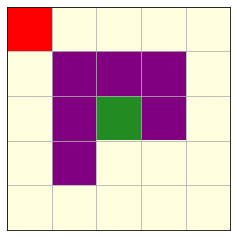

In [5]:
maze = Maze.create(['o....',
                    '.###.',
                    '.#*#.',
                    '.#...',
                    '.....'])
maze.plot()

Optimal search algorithms try to find the **optimal path**, which is the path with the lowest **accumulated cost**. The latter is the total cost of all moves that are required to travel the path. In case of a maze problem, the cost of each move is equal to 1.

### Uniform cost

The uniform cost is similar to greedy search. The only difference is it always selects the path with the lowest accumulated cost instead of heuristic value:

ALGORITHM: Uniform cost
RESULT: SUCCES
Elapsed time: 0.004181861877441406 seconds
Number of iterations: 32
Maximum length of queue: 9
Accumulated cost of path to goal: 8.0


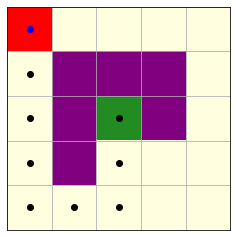

In [7]:
maze.search(UC).plot()

This greedy approach doesn't garantee to find the optimal path, but in this example it finds the optimal path, which is also the shortest path as each move has a cost of 1.

###Optimal uniform cost

The optimal uniform cost algorithm extends uniform cost with a weak integration of the branch-and-bound technique: it doesn't stop when a path to the goal is in the queue, but it stops when a path to the goal is the first element in the queue. As the queue is sorted by accumulated cost, this new stopping criterion garantees the optimal path will always be found.

Let's try this out:

ALGORITHM: Optimal uniform cost
RESULT: SUCCES
Elapsed time: 0.010360240936279297 seconds
Number of iterations: 44
Maximum length of queue: 9
Accumulated cost of path to goal: 8.0


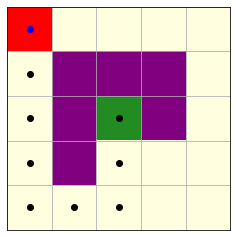

In [8]:
maze.search(OUC).plot()

### Branch-and-bound extended uniform cost

The branch-and-bound technique can also be fully integrated in the optimal uniform cost algorithm. This results into the branch-and-bound extended uniform cost algorithm:

ALGORITHM: Branch-and-bound extended uniform cost
RESULT: SUCCES
Elapsed time: 0.010529279708862305 seconds
Number of iterations: 44
Maximum length of queue: 9
Accumulated cost of path to goal: 8.0


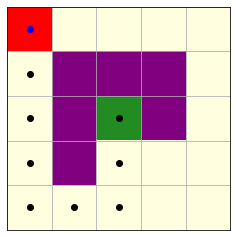

In [9]:
maze.search(BBUC).plot()

In this small example, however, applying branch-and-bound doesn't reduce the computational cost significantly.

### Estimate extended uniform cost

Instead of branch-and-bound, it is more efficient to use a heuristic function. That is exactly what the estimate extended uniform cost algorithm does! It is the same algorithm as optimal uniform cost, but it sorts the entire queue by **f-value**, which is the sum of the accumulated cost and the heuristic value. Recall that the heuristic value of a path in a maze is the manhattan distance to the goal.

Let's check this out:

ALGORITHM: Estimate extended uniform cost
RESULT: SUCCES
Elapsed time: 0.0036339759826660156 seconds
Number of iterations: 9
Maximum length of queue: 4
Accumulated cost of path to goal: 8.0


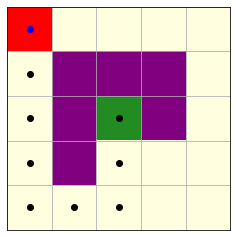

In [10]:
maze.search(EEUC).plot()

Indeed, the number of iterations is reduced to 9 and the maximum number of paths in the queue is 4!

###A*

Finally, the A\*-algorithm extends the estimate extended uniform cost algorithm by a technique called **redundant path deletion**. A redundant path has a accumulated cost which is larger than the cost of a path in the queue which contains the last node of the redundant path.

Initial queue:
o....  
.###.  
.#x#.  
.#...  
.....  

Iteration 1
Path removed from queue:
o....
.###.
.#x#.
.#...
.....
New paths:
o....  
.###.  
.#x#.  
.#x..  
.....  
Paths in queue:
o....  
.###.  
.#x#.  
.#x..  
.....  

Iteration 2
Path removed from queue:
o....
.###.
.#x#.
.#x..
.....
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#xx.  .#x..  
.....  ..x..  
Paths in queue:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#xx.  .#x..  
.....  ..x..  

Iteration 3
Path removed from queue:
o....
.###.
.#x#.
.#xx.
.....
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#xxx  .#xx.  
.....  ...x.  
Paths in queue:
o....  o....  o....  
.###.  .###.  .###.  
.#x#.  .#x#.  .#x#.  
.#x..  .#xxx  .#xx.  
..x..  .....  ...x.  

Iteration 4
Path removed from queue:
o....
.###.
.#x#.
.#x..
..x..
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#x..  .#x..  
.xx..  ..xx.  
Redundant paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#x..  .#xx.  
..xx.  ...x.  

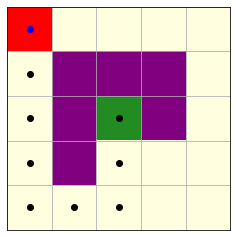

In [12]:
maze.search(AS, print_queue=True).plot()

We see that even in this small maze example, redundant paths were removed in iteration 4. This also explains why the maximum length of the queue is 3, whereas it is 4 when EEUC is applied.

## Solving a graph problem

###Creating the graph

Recall that we need to import class `Graph` from module `graph` to create a graph:

In [13]:
from SearchExerciser.graph import Graph

Optimal search algorithms take into account costs. The cost is an edge attribute and is added as third element to the edge tuples or lists. Some of the algorithms also use heuristic values. Recall that these values are node attributes that we pass as dictionary:

In [16]:
graph = Graph.create(edges=[("S", "A", 3), ("S", "D", 4), ("A", "D", 5), ("A", "B", 4), ("D", "E", 2), 
                            ("B", "E", 5), ("B", "C", 4), ("E", "F", 4), ("F", "G", 3)], 
                     heuristic={"S":11, "A":10.4, "B":6.7, "C":4, "D":8.9, "E":6.9, "F":3, "G":0})

We define the node coordinates and visualize the graph calling method `plot`:

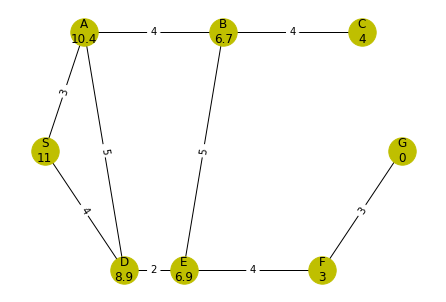

In [17]:
coordinates = dict(S=[0, 0.5], 
                   A=[1, 1],
                   D=[2, 0],
                   E=[3.5, 0],
                   B=[4.5, 1],
                   F=[7, 0],
                   C=[8, 1],
                   G=[9, 0.5])
graph.plot(coordinates)

The cost of each edge is added indeed to the plot of the graph, as is the the heuristic value of each node. In this example, the costs may be interpreted as real distances between nodes, whereas the heuristic values may be interpreted as estimates of the distance based on bird's eye view (or as the crow flies). Note that the accumulated cost of a path is the sum of the costs of the edges the path consists of. 

### Uniform cost

Let's start by applying the uniform cost algorithm that only takes into account the accumulated costs of the paths:

In [19]:
graph.search(UC, print_queue=True);

Initial queue:
[S(0.0)]

Iteration 1
Path removed from queue:
S(0.0)
New paths:
[SA(3.0),SD(4.0)]
Paths in queue:
[SA(3.0),SD(4.0)]

Iteration 2
Path removed from queue:
SA(3.0)
New paths:
[SAB(7.0),SAD(8.0)]
Paths in queue:
[SD(4.0),SAB(7.0),SAD(8.0)]

Iteration 3
Path removed from queue:
SD(4.0)
New paths:
[SDA(9.0),SDE(6.0)]
Paths in queue:
[SDE(6.0),SAB(7.0),SAD(8.0),SDA(9.0)]

Iteration 4
Path removed from queue:
SDE(6.0)
New paths:
[SDEB(11.0),SDEF(10.0)]
Paths in queue:
[SAB(7.0),SAD(8.0),SDA(9.0),SDEF(10.0),SDEB(11.0)]

Iteration 5
Path removed from queue:
SAB(7.0)
New paths:
[SABC(11.0),SABE(12.0)]
Paths in queue:
[SAD(8.0),SDA(9.0),SDEF(10.0),SABC(11.0),SDEB(11.0),SABE(12.0)]

Iteration 6
Path removed from queue:
SAD(8.0)
New paths:
[SADE(10.0)]
Paths in queue:
[SDA(9.0),SADE(10.0),SDEF(10.0),SABC(11.0),SDEB(11.0),SABE(12.0)]

Iteration 7
Path removed from queue:
SDA(9.0)
New paths:
[SDAB(13.0)]
Paths in queue:
[SADE(10.0),SDEF(10.0),SABC(11.0),SDEB(11.0),SABE(12.0),SDAB(13.0

It finds the optimal path in this case. Note that the accumulated cost of each path is also printed.

### Optimal uniform cost

Optimal uniform cost also finds the optimal path:

In [20]:
graph.search(OUC, print_queue=True);

Initial queue:
[S(0.0)]

Iteration 1
Path removed from queue:
S(0.0)
New paths:
[SA(3.0),SD(4.0)]
Paths in queue:
[SA(3.0),SD(4.0)]

Iteration 2
Path removed from queue:
SA(3.0)
New paths:
[SAB(7.0),SAD(8.0)]
Paths in queue:
[SD(4.0),SAB(7.0),SAD(8.0)]

Iteration 3
Path removed from queue:
SD(4.0)
New paths:
[SDA(9.0),SDE(6.0)]
Paths in queue:
[SDE(6.0),SAB(7.0),SAD(8.0),SDA(9.0)]

Iteration 4
Path removed from queue:
SDE(6.0)
New paths:
[SDEB(11.0),SDEF(10.0)]
Paths in queue:
[SAB(7.0),SAD(8.0),SDA(9.0),SDEF(10.0),SDEB(11.0)]

Iteration 5
Path removed from queue:
SAB(7.0)
New paths:
[SABC(11.0),SABE(12.0)]
Paths in queue:
[SAD(8.0),SDA(9.0),SDEF(10.0),SABC(11.0),SDEB(11.0),SABE(12.0)]

Iteration 6
Path removed from queue:
SAD(8.0)
New paths:
[SADE(10.0)]
Paths in queue:
[SDA(9.0),SADE(10.0),SDEF(10.0),SABC(11.0),SDEB(11.0),SABE(12.0)]

Iteration 7
Path removed from queue:
SDA(9.0)
New paths:
[SDAB(13.0)]
Paths in queue:
[SADE(10.0),SDEF(10.0),SABC(11.0),SDEB(11.0),SABE(12.0),SDAB(13.0

Note that optimal uniform cost has performed 12 iterations, whereas uniform cost only needs 9 iterations to find the optimal path. This is because optimal uniform cost continues until the optimal path is the first element in the queue!

###Branch-and-bound extended uniform cost

The full branch-and-bound extension did not reduce the computational cost to solve the maze problem. Let's see if it has added value to solve the graph problem:

In [21]:
graph.search(BBUC, print_queue=True);

Initial queue:
[S(0.0)]

Iteration 1
Path removed from queue:
S(0.0)
New paths:
[SA(3.0),SD(4.0)]
Paths in queue:
[SA(3.0),SD(4.0)]

Iteration 2
Path removed from queue:
SA(3.0)
New paths:
[SAB(7.0),SAD(8.0)]
Paths in queue:
[SD(4.0),SAB(7.0),SAD(8.0)]

Iteration 3
Path removed from queue:
SD(4.0)
New paths:
[SDA(9.0),SDE(6.0)]
Paths in queue:
[SDE(6.0),SAB(7.0),SAD(8.0),SDA(9.0)]

Iteration 4
Path removed from queue:
SDE(6.0)
New paths:
[SDEB(11.0),SDEF(10.0)]
Paths in queue:
[SAB(7.0),SAD(8.0),SDA(9.0),SDEF(10.0),SDEB(11.0)]

Iteration 5
Path removed from queue:
SAB(7.0)
New paths:
[SABC(11.0),SABE(12.0)]
Paths in queue:
[SAD(8.0),SDA(9.0),SDEF(10.0),SABC(11.0),SDEB(11.0),SABE(12.0)]

Iteration 6
Path removed from queue:
SAD(8.0)
New paths:
[SADE(10.0)]
Paths in queue:
[SDA(9.0),SADE(10.0),SDEF(10.0),SABC(11.0),SDEB(11.0),SABE(12.0)]

Iteration 7
Path removed from queue:
SDA(9.0)
New paths:
[SDAB(13.0)]
Paths in queue:
[SADE(10.0),SDEF(10.0),SABC(11.0),SDEB(11.0),SABE(12.0),SDAB(13.0

Again, there is no significant reduction of the computational cost applying branch-and-bound, although it prunes paths in iterations 9, 11, and 12. So the branch-and-bound extension could be an advantage when solving larger problems.

###Estimate extended uniform cost

Recall that the estimate extended uniform cost algorithm also uses the heuristic values:

In [22]:
graph.search(EEUC, print_queue=True);

Initial queue:
[S(11.0)]

Iteration 1
Path removed from queue:
S(11.0)
New paths:
[SA(13.4),SD(12.9)]
Paths in queue:
[SD(12.9),SA(13.4)]

Iteration 2
Path removed from queue:
SD(12.9)
New paths:
[SDA(19.4),SDE(12.9)]
Paths in queue:
[SDE(12.9),SA(13.4),SDA(19.4)]

Iteration 3
Path removed from queue:
SDE(12.9)
New paths:
[SDEB(17.7),SDEF(13.0)]
Paths in queue:
[SDEF(13.0),SA(13.4),SDEB(17.7),SDA(19.4)]

Iteration 4
Path removed from queue:
SDEF(13.0)
New paths:
[SDEFG(13.0)]
Paths in queue:
[SDEFG(13.0),SA(13.4),SDEB(17.7),SDA(19.4)]

Path to goal found in new paths:
SDEFG(13.0)

ALGORITHM: Estimate extended uniform cost
RESULT: SUCCES
Elapsed time: 0.015378475189208984 seconds
Number of iterations: 4
Maximum length of queue: 4
Accumulated cost of path to goal: 13.0


We only need 4 iterations to find the optimal path! Note that in this case, the printed value after each path is the f-value, which is the sum of accumulated cost and heuristic value.

### A*

Let's check if A* can do even better:

In [23]:
graph.search(AS, print_queue=True);

Initial queue:
[S(11.0)]

Iteration 1
Path removed from queue:
S(11.0)
New paths:
[SA(13.4),SD(12.9)]
Paths in queue:
[SD(12.9),SA(13.4)]

Iteration 2
Path removed from queue:
SD(12.9)
New paths:
[SDA(19.4),SDE(12.9)]
Redundant paths:
[SDA(19.4)]
Paths in queue:
[SDE(12.9),SA(13.4)]

Iteration 3
Path removed from queue:
SDE(12.9)
New paths:
[SDEB(17.7),SDEF(13.0)]
Paths in queue:
[SDEF(13.0),SA(13.4),SDEB(17.7)]

Iteration 4
Path removed from queue:
SDEF(13.0)
New paths:
[SDEFG(13.0)]
Paths in queue:
[SDEFG(13.0),SA(13.4),SDEB(17.7)]

Path to goal found in new paths:
SDEFG(13.0)

ALGORITHM: A*
RESULT: SUCCES
Elapsed time: 0.01381993293762207 seconds
Number of iterations: 4
Maximum length of queue: 3
Accumulated cost of path to goal: 13.0


In this small example, only one redundant path is deleted in iteration 2. When solving larger problems, however, redundant path deletion definitely makes a (big) difference!

##Route planning example

Consider 7 cities in the Belgian province of West Flanders: Kortrijk, Roeselare, Ieper, Veurne, Brugge, Waregem, and Oostende. We have to travel from Waregem to Veurne, and therefore we need to find the shortest route in distance.

Dictionary `latlon` contains the latitude and longitude coordinate of each city:

In [24]:
latlon = dict(K=[50.818991968015816, 3.257750789112345],   # Kortrijk
              R=[50.95079505659209, 3.12951304151648],     # Roeselare
              I=[50.84914711747873, 2.8767457158400944],   # Ieper
              V=[51.07067249574684, 2.6680470070455904],   # Veurne
              B=[51.21004787618063, 3.226330063140007],    # Brugge
              W=[50.88927004676849, 3.423023700102434],    # Waregem
              O=[51.21510254021232, 2.9295193261268713])   # Oostende

Note that the city names are abbreviated using their first letter.

The cities are connected to each other by routes, which can be represented by a graph, where the nodes correspond to the cities and the edges to the routes. The cost of an edge is the distance of the corresponding route between the two cities it connects. The heuristic value of each node is the estimated distance based on bird's eye view between the city represented by the node and the city of Veurne, which corresponds to the goal node.

Let's define this graph:

In [33]:
cities = Graph.create(edges=[("K", "I", 30),
                             ("K", "R", 25),
                             ("K", "W", 15),
                             ("I", "R", 25),
                             ("I", "V", 30),
                             ("V", "O", 30),
                             ("W", "R", 30),
                             ("R", "B", 40),
                             ("W", "B", 55),
                             ("R", "O", 40),
                             ("O", "B", 30)],
                      start="W", 
                      goal="V",
                      heuristic=dict(W=65, K=55, I=25, R=40, B=50, O=25, V=0))

To plot the graph, we call method `plot` and pass dictionary `latlon`. However, we need to switch latitude and longitude:

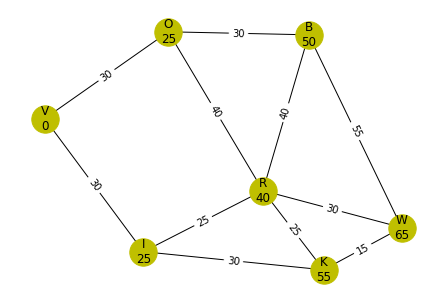

In [34]:
cities.plot({city: [ll[1], ll[0]] for city, ll in latlon.items()})

The shortest route in distance is the optimal path, which can be found by applying A*:

In [35]:
print("Shortest route:", cities.search(AS))

ALGORITHM: A*
RESULT: SUCCES
Elapsed time: 0.002642393112182617 seconds
Number of iterations: 4
Maximum length of queue: 3
Accumulated cost of path to goal: 75.0
Shortest route: WKIV


The shortest route in distance is Waregem - Kortrijk - Ieper - Veurne!